In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, io
from pandas import Series, DataFrame, read_table
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Data Analysis and Exploration


## User Data


### Exploratory Data Analysis


In [3]:
df_users = pd.read_csv("BX-Users.csv", delimiter=",", encoding="latin-1")
df_users.head()

In [5]:
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278859 non-null  object 
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), object(2)
memory usage: 6.4+ MB
None


In [6]:
print(df_users.isnull().sum())

user_id          0
Location         1
Age         110763
dtype: int64


In [7]:
print("Number of unique users:", df_users["user_id"].nunique())

Number of unique users: 278859


Let's convert the'user_id' column to numeric values.


In [9]:
df_users["user_id"] = pd.to_numeric(df_users["user_id"], errors="coerce")
df_users = df_users.sort_values(by=["user_id"])
df_users.reset_index(drop=True, inplace=True)
df_users.head()

,user_id,Location,Age
0,1.0,"nyc, new york, usa",NaN
1,2.0,"stockton, california, usa",18.0
2,3.0,"moscow, yukon territory, russia",NaN
3,4.0,"porto, v.n.gaia, portugal",17.0
4,5.0,"farnborough, hants, united kingdom",NaN


## Book Data


### Exploratory Data Analysis


In [10]:
df_books = pd.read_csv("BX-Books.csv", delimiter=",", encoding="latin-1")
df_books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [21]:
print(df_books.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 271379 non-null  object 
 1   book_title           271379 non-null  object 
 2   book_author          271377 non-null  object 
 3   year_of_publication  271357 non-null  float64
 4   publisher            271377 non-null  object 
dtypes: float64(1), object(4)
memory usage: 10.4+ MB
None


In [20]:
df_books.isna().any()

isbn                   False
book_title             False
book_author             True
year_of_publication     True
publisher               True
dtype: bool

In [19]:
print(df_books.isnull().sum())

isbn                    0
book_title              0
book_author             2
year_of_publication    22
publisher               2
dtype: int64


In [14]:
unique_isbn = df_books["isbn"].nunique()
print(f"Number of unique isbn: {unique_isbn}")

Number of unique isbn: 271379


### Data Preparation


In [16]:
df_books = df_books.sort_values(by=["book_title", "isbn"], ascending=[0, 1])
df_books.reset_index(drop=True, inplace=True)

,isbn,book_title,book_author,year_of_publication,publisher
0,2842192508,Ã?Â?thique en toc,Didier Daeninckx,1998,Baleine
1,3442725739,Ã?Â?stlich der Berge.,David Guterson,2000,btb
2,3451274973,Ã?Â?sterlich leben.,Anselm GrÃ?Â¼n,2001,"Herder, Freiburg"
3,325721538X,Ã?Â?rger mit Produkt X. Roman.,Joan Aiken,1987,Diogenes Verlag
4,3499232499,Ã?Â?lpiraten.,Janwillem van de Wetering,2002,Rowohlt Tb.


In [17]:
df_books["year_of_publication"] = pd.to_numeric(
    df_books["year_of_publication"], errors="coerce"
)

In [18]:
df_books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,2842192508,Ã?Â?thique en toc,Didier Daeninckx,1998.0,Baleine
1,3442725739,Ã?Â?stlich der Berge.,David Guterson,2000.0,btb
2,3451274973,Ã?Â?sterlich leben.,Anselm GrÃ?Â¼n,2001.0,"Herder, Freiburg"
3,325721538X,Ã?Â?rger mit Produkt X. Roman.,Joan Aiken,1987.0,Diogenes Verlag
4,3499232499,Ã?Â?lpiraten.,Janwillem van de Wetering,2002.0,Rowohlt Tb.


## Ratings Data


In [46]:
df_ratings = pd.read_csv("BX-Book-Ratings.csv", delimiter=",", encoding="latin-1")

### Data Exploration


In [12]:
df_ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [13]:
print(df_ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1048575 non-null  int64 
 1   isbn     1048575 non-null  object
 2   rating   1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None


In [15]:
nunique_rating_user_id = df_ratings["user_id"].nunique()
print(f"Unique number of user_id: {nunique_rating_user_id}")

unique_rating_isbn = df_ratings["isbn"].nunique()
print(f"Unique number of isbn: {unique_rating_isbn}")

Unique number of user_id: 95513
Unique number of isbn: 322102


In [16]:
df_ratings.isnull().sum()

user_id    0
isbn       0
rating     0
dtype: int64

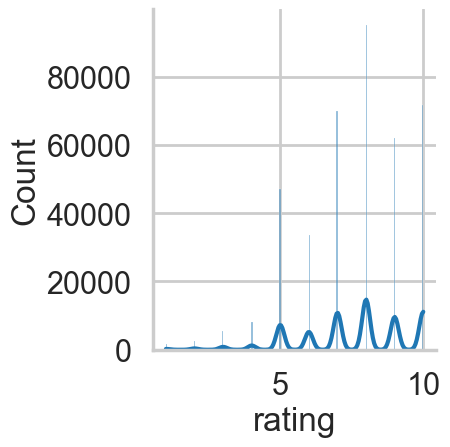

In [56]:
sns.displot(df_ratings["rating"], kde=True)

### Data Preparation


In [48]:
df_ratings = df_ratings[df_ratings["rating"] != 0]

df_ratings.head()

,user_id,isbn,rating
1,276726,155061224,5
3,276729,052165615X,3
4,276729,521795028,6
6,276736,3257224281,8
7,276737,600570967,6


In [53]:
# df_ratings = df_ratings[df_ratings["rating"] > 4]
# df_ratings.head()

In [55]:
df_book_ratings = pd.merge(df_ratings, df_books, on="isbn")
df_book_ratings = df_book_ratings[["user_id", "isbn", "book_title", "rating"]]
df_book_ratings = df_book_ratings.sort_values(
    ["isbn", "book_title"], ascending=[0, 0]
).reset_index(drop=True)

df_book_ratings.head()

,user_id,isbn,book_title,rating
0,100906,B000234N3A,Fraud,9
1,148258,B0001I1KOG,New York Public Library Literature Companion,10
2,24194,B0001GMSV2,Find Me,8
3,179772,B0001GMSV2,Find Me,8
4,192093,B0001FZGRQ,The Clan of the Cave Bear,9


In [58]:
df_book_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351865 entries, 0 to 351864
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     351865 non-null  int64 
 1   isbn        351865 non-null  object
 2   book_title  351865 non-null  object
 3   rating      351865 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 10.7+ MB


In [59]:
user_id_idx_map = {
    user: i for i, user in enumerate(df_book_ratings["user_id"].unique())
}

print(len(user_id_idx_map))

61877


In [60]:
df_book_ratings["user_id_idx"] = df_book_ratings["user_id"].map(user_id_idx_map)

df_book_ratings.head()

,user_id,isbn,book_title,rating,user_id_idx
0,100906,B000234N3A,Fraud,9,0
1,148258,B0001I1KOG,New York Public Library Literature Companion,10,1
2,24194,B0001GMSV2,Find Me,8,2
3,179772,B0001GMSV2,Find Me,8,3
4,192093,B0001FZGRQ,The Clan of the Cave Bear,9,4


In [61]:
isbn_idx_map = {isbn: i for i, isbn in enumerate(df_book_ratings["isbn"].unique())}

print(len(isbn_idx_map))

142032


In [62]:
df_book_ratings["isbn_idx"] = df_book_ratings["isbn"].map(isbn_idx_map)

df_book_ratings.head()

,user_id,isbn,book_title,rating,user_id_idx,isbn_idx
0,100906,B000234N3A,Fraud,9,0,0
1,148258,B0001I1KOG,New York Public Library Literature Companion,10,1,1
2,24194,B0001GMSV2,Find Me,8,2,2
3,179772,B0001GMSV2,Find Me,8,3,2
4,192093,B0001FZGRQ,The Clan of the Cave Bear,9,4,3


In [63]:
ratings_matrix = df_book_ratings.pivot_table(
    index="user_id_idx", columns="isbn_idx", values="rating"
)

In [ ]:
ratings_matrix.head()

In [ ]:
ratings_matrix.info()

In [ ]:
# get the column names of the ratings matrix
isbn_idx_7 = ratings_matrix[7]

In [ ]:
isbn_idx_7.info()

In [ ]:
df_isbn_idx_7 = isbn_idx_7.to_frame()

In [ ]:
df_isbn_idx_7.info()

In [ ]:
df_isbn_idx_7.head()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the ratings matrix into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    ratings_matrix.index, ratings_matrix.values, test_size=0.25
)